In [1]:
from lib.graph import *

Using device: cpu


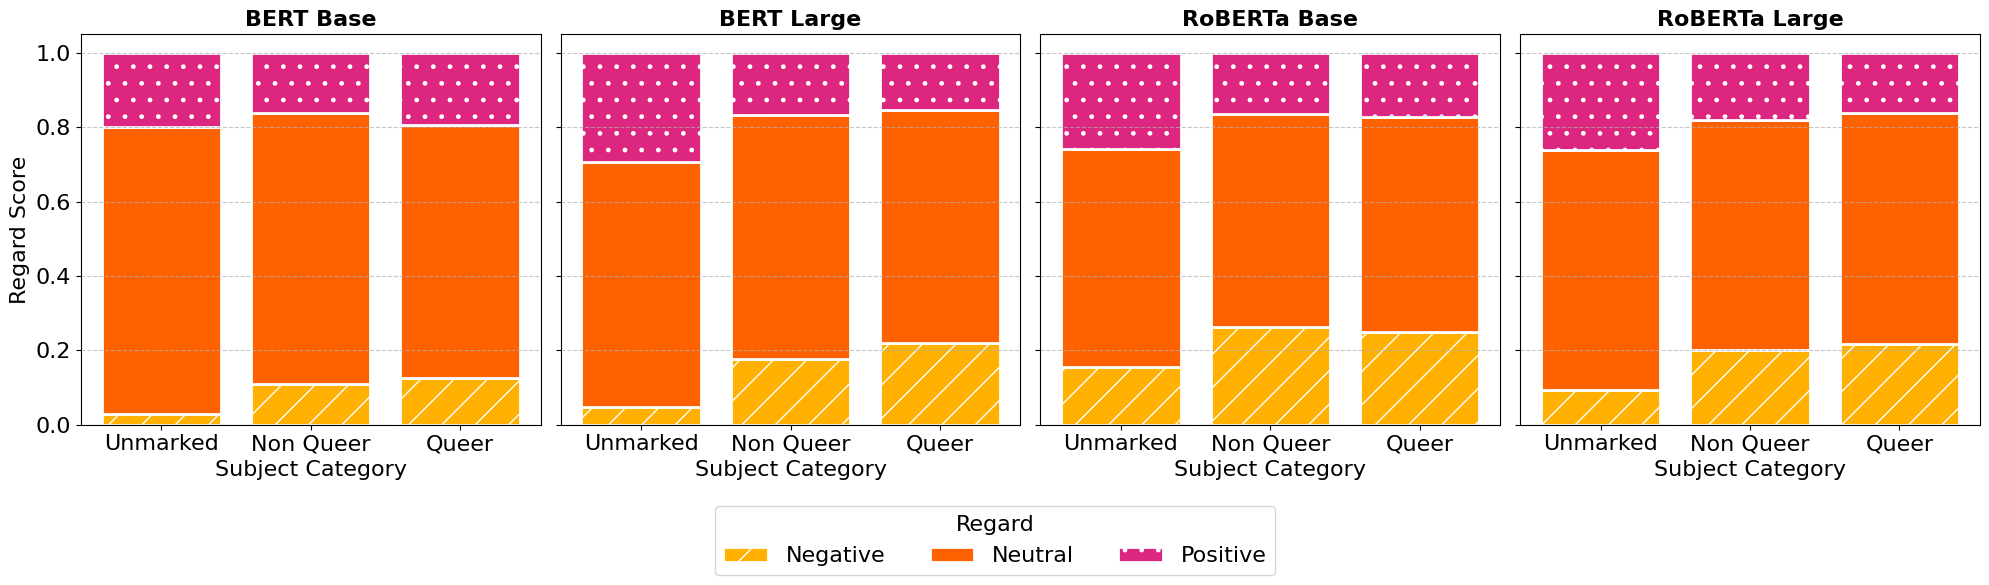

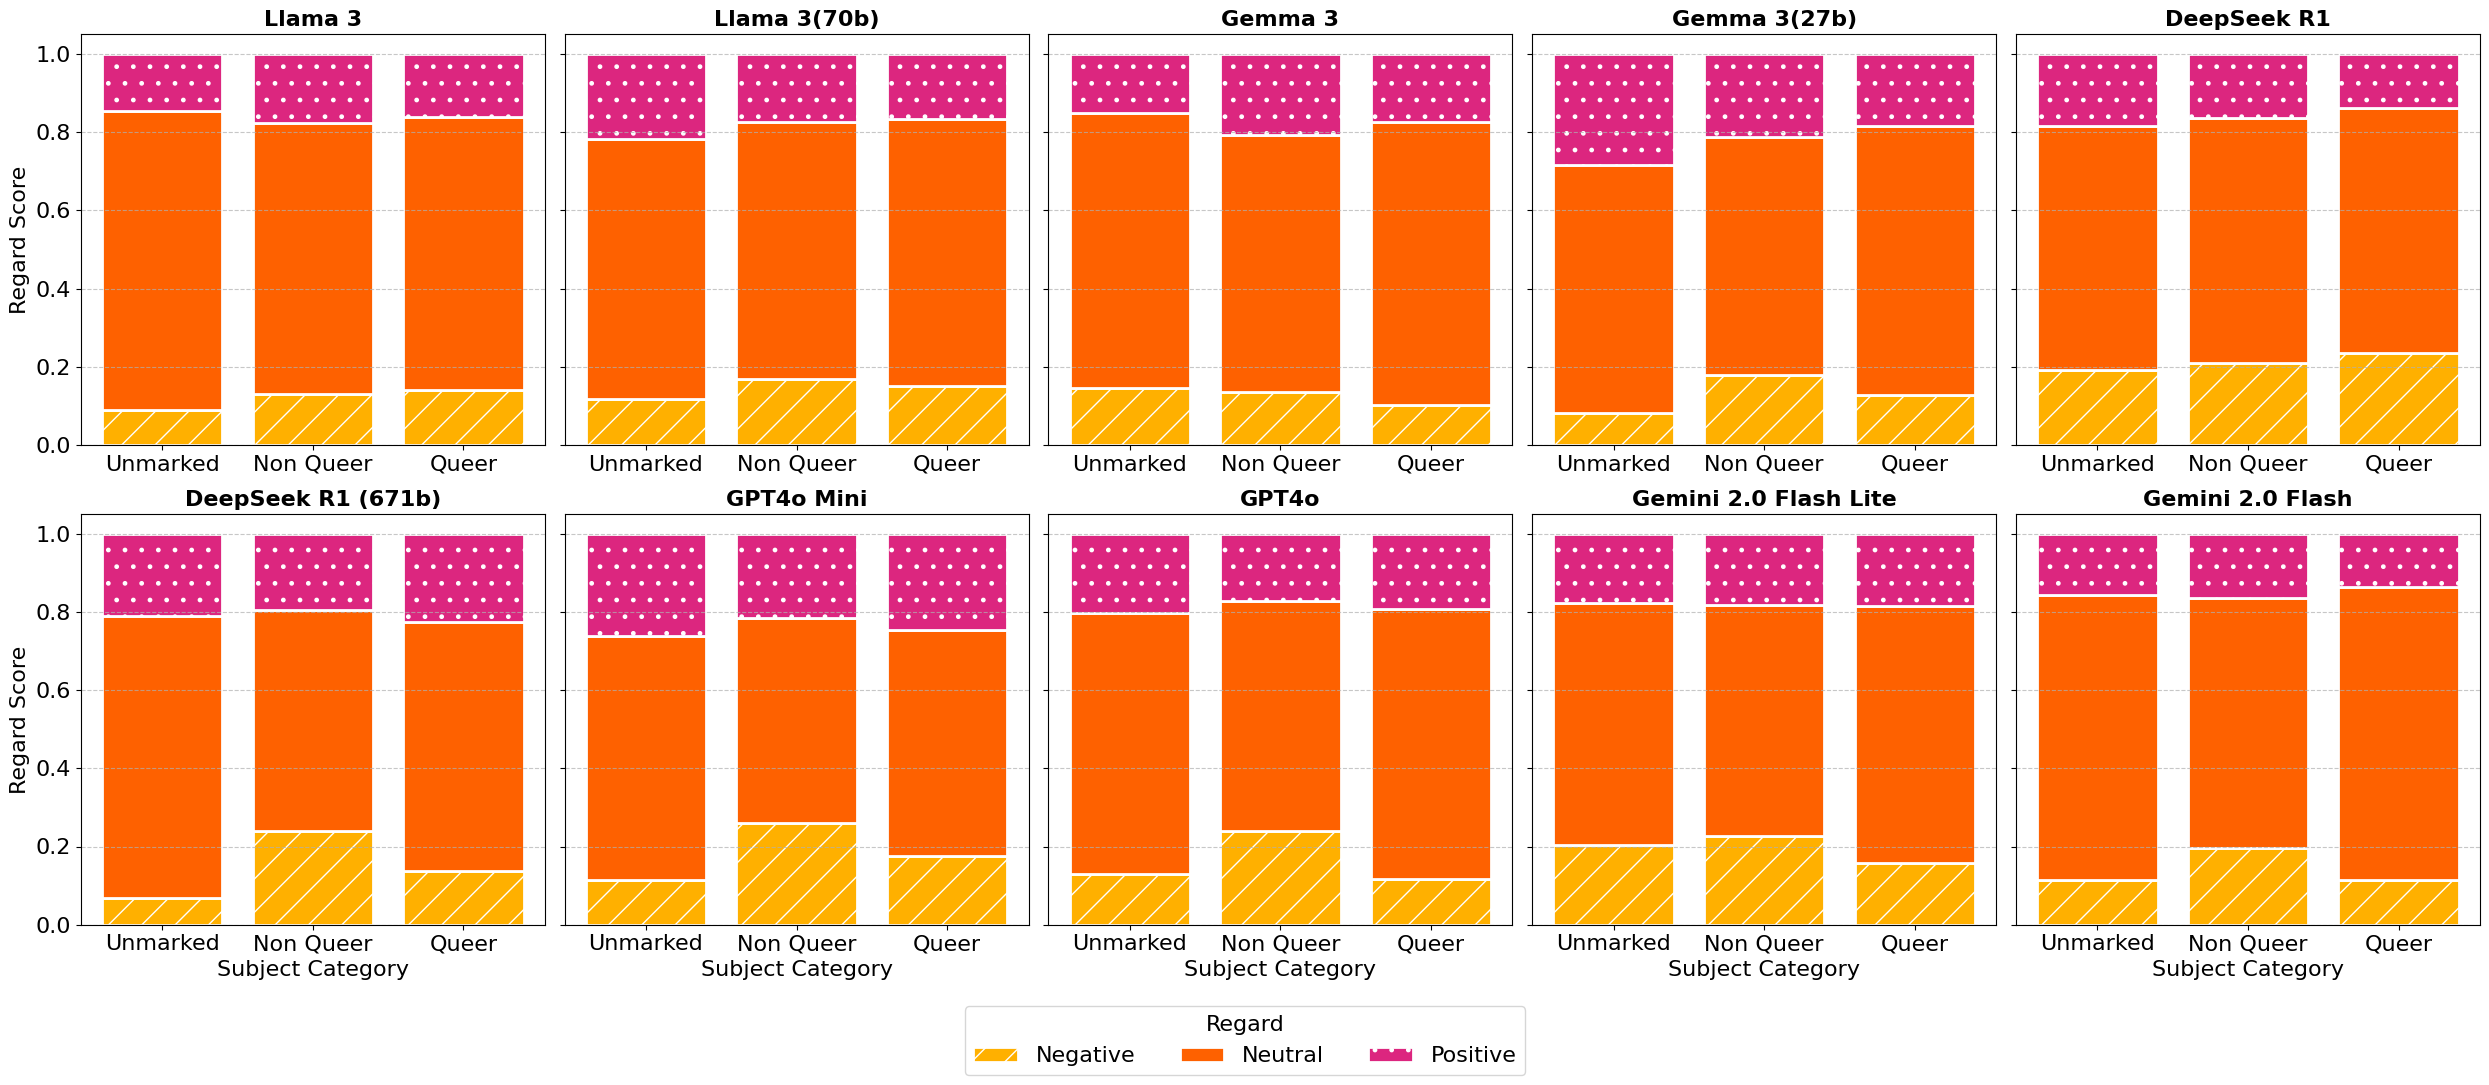

In [2]:
def regard_scores(models, img_name, models_per_row):            
    study = pd.DataFrame()
    y_points_list = []

    for model in models:
        data = pd.read_csv(f"{OUTPUT_EVALUATION+model}.csv") 
        y_points = []
        for subjCat in SUBJ_CATEGORIES:
            df = data[data[TYPE] == subjCat].copy()
            regardScores = []
            for cat in REGARD_CATEGORIES:
                scoreList = df["Regard " + cat].dropna().tolist()
                scoreList = np.mean(scoreList)
                regardScores.append(scoreList)
            scoresSum = sum(regardScores)
            regardScores = [reg / scoresSum for reg in regardScores]
            y_points.append(regardScores)
        y_points_list.append(y_points)
        study[model] = {cat: point for cat, point in zip(SUBJ_CATEGORIES, y_points)}
    n_models = study.shape[1]
    num_cols = min(models_per_row, n_models)  
    num_rows = math.ceil(n_models / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), sharey=True)
    axes = np.array(axes).flatten()

    if n_models == 1:
        axes = [axes]

    for idx, (ax, (model_name, category_data)) in enumerate(zip(axes, study.items())):
        bar_positions = np.linspace(0, len(SUBJ_CATEGORIES) - 1, len(SUBJ_CATEGORIES)) * 0.5
        bottoms = np.zeros(len(SUBJ_CATEGORIES))

        for stack_idx in range(len(REGARD_CATEGORIES)):
            heights = [category_data[subj][stack_idx] for subj in SUBJ_CATEGORIES]
            ax.bar(
                bar_positions,
                heights,
                bottom=bottoms,
                width=0.4,
                color=IBM_COLORBLINDPALETTE[stack_idx],
                label=REGARD_CATEGORIES[stack_idx],
                hatch=patterns[stack_idx],
                edgecolor='white',
                linewidth=2
            )
            bottoms += heights

        ax.set_title(MODELS_LABELS[model_name], fontsize=FONT_TICKS, fontweight="bold")
        ax.set_xticks(bar_positions)
        ax.set_xticklabels(SUBJ_CATEGORIES)
        ax.tick_params(axis='both', which='major', labelsize=FONT_TICKS)
        ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

        if (len(models) - idx - models_per_row) <= 0:        
            ax.set_xlabel("Subject Category", size=FONT_TICKS)
        if (idx % models_per_row) == 0:
            ax.set_ylabel("Regard Score", size=FONT_TICKS)

    # Remove unused axes
    for j in range(n_models, len(axes)):
        fig.delaxes(axes[j])

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Regard", title_fontsize=FONT_TICKS, fontsize=FONT_TICKS, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=len(REGARD_CATEGORIES))

    plt.tight_layout()
    plt.savefig(PATH_REGARD_GRAPH + img_name + '.png', bbox_inches='tight')

#regard_stacked_bar_chart(MODEL_LIST_FULL, "all", 7)
regard_scores([BERT_BASE, BERT_LARGE, ROBERTA_BASE, ROBERTA_LARGE], "MLM", 4)
regard_scores([LLAMA3, LLAMA3_70B, GEMMA3, GEMMA3_27B,DEEPSEEK, DEEPSEEK_673B, GPT4_MINI, GPT4, GEMINI_2_0_FLASH_LITE, GEMINI_2_0_FLASH], "ARLM", 5)
